# Import Libraries

In [2]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import DMatrix
from xgboost import cv
from xgboost import plot_importance

ModuleNotFoundError: No module named 'xgboost'

# Load the dataset

In [138]:
#Load data for train and test
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
train.shape

(1460, 81)

# Get Info on the dataset

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Analysis on Target Variable

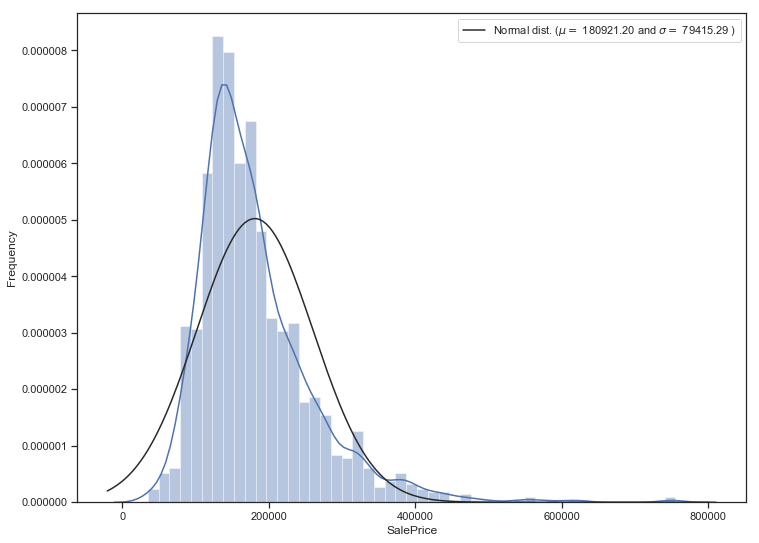

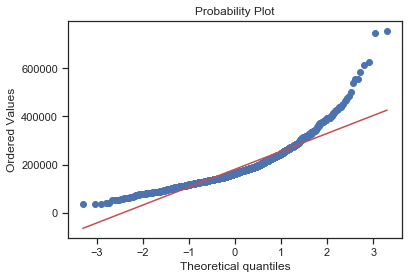

In [70]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Transform the target variable to normal distribution

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


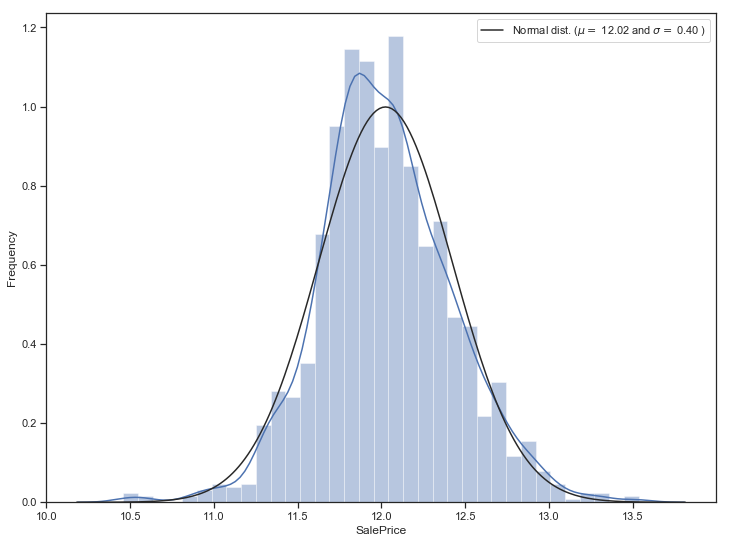

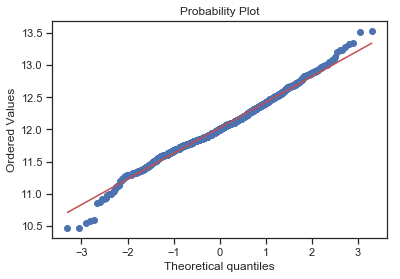

In [139]:
#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Check for Missing values

In [140]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [141]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

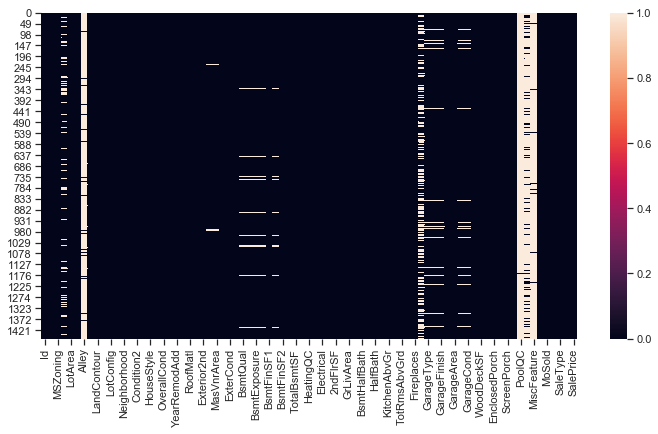

In [142]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [143]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [144]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

## Visualising missing values

In [145]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [146]:
Isnull.columns = ['count']
Isnull.index.names = ['Name']
Isnull['Name'] = Isnull.index


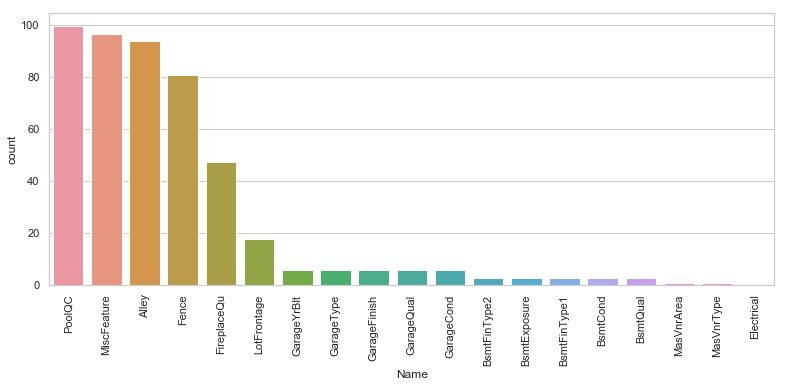

In [147]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

# Correlation

In [80]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=[np.number])
train_corr.shape

(1460, 38)

In [81]:
#Delete Id because that is not need for corralation plot
del train_corr['Id']

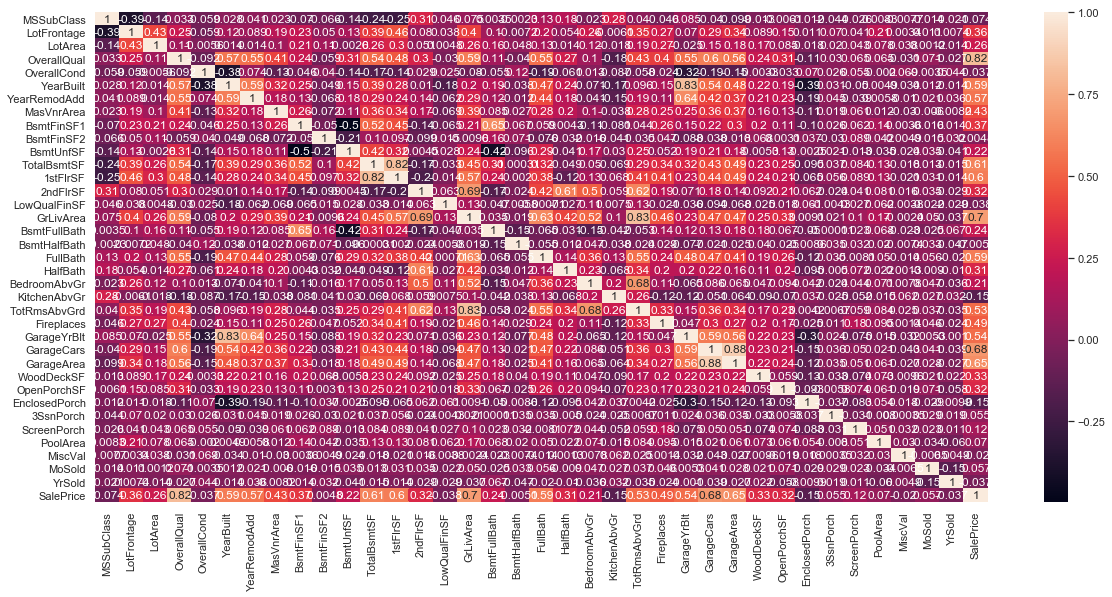

In [82]:
#Corelation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

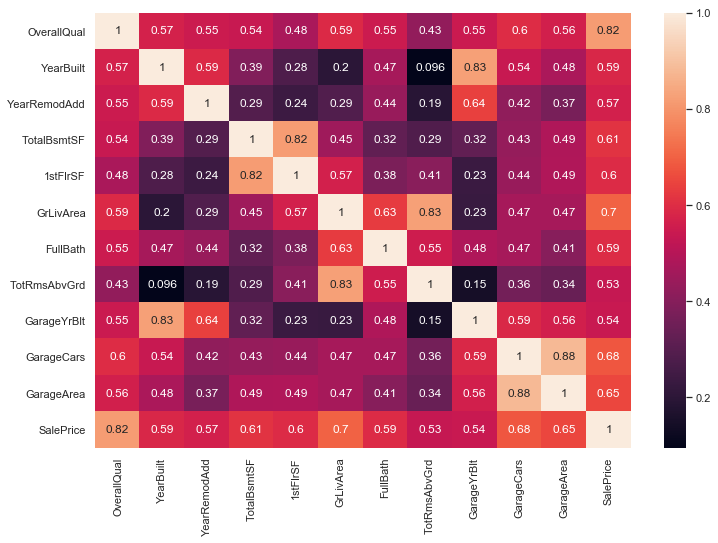

In [83]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

#### --- Overall qulaity and Saleprice are highly correlated - 82% ---

In [84]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

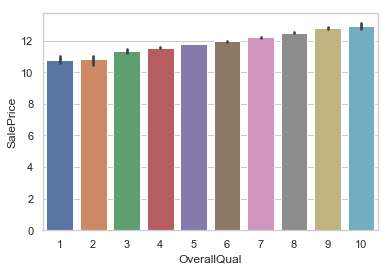

In [85]:
sns.barplot(train.OverallQual, train.SalePrice)

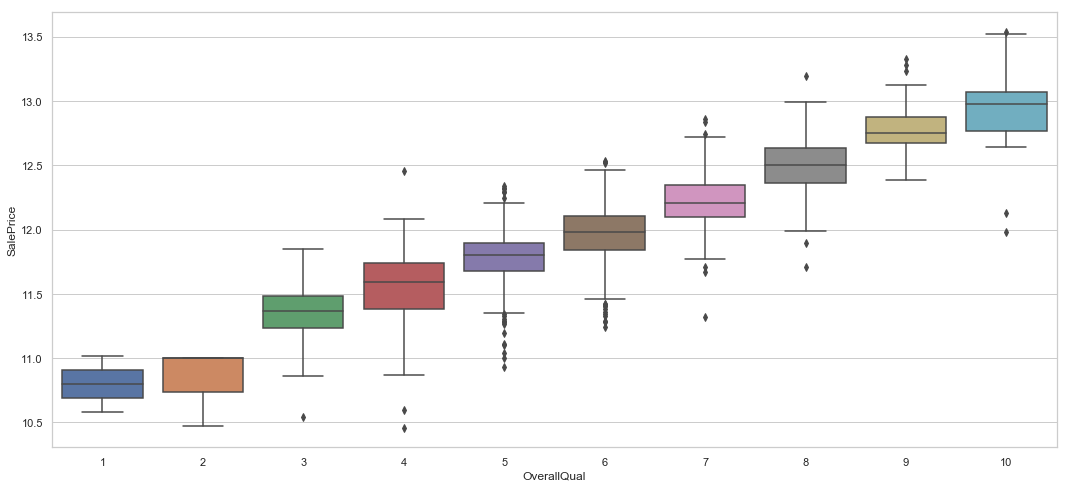

In [86]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


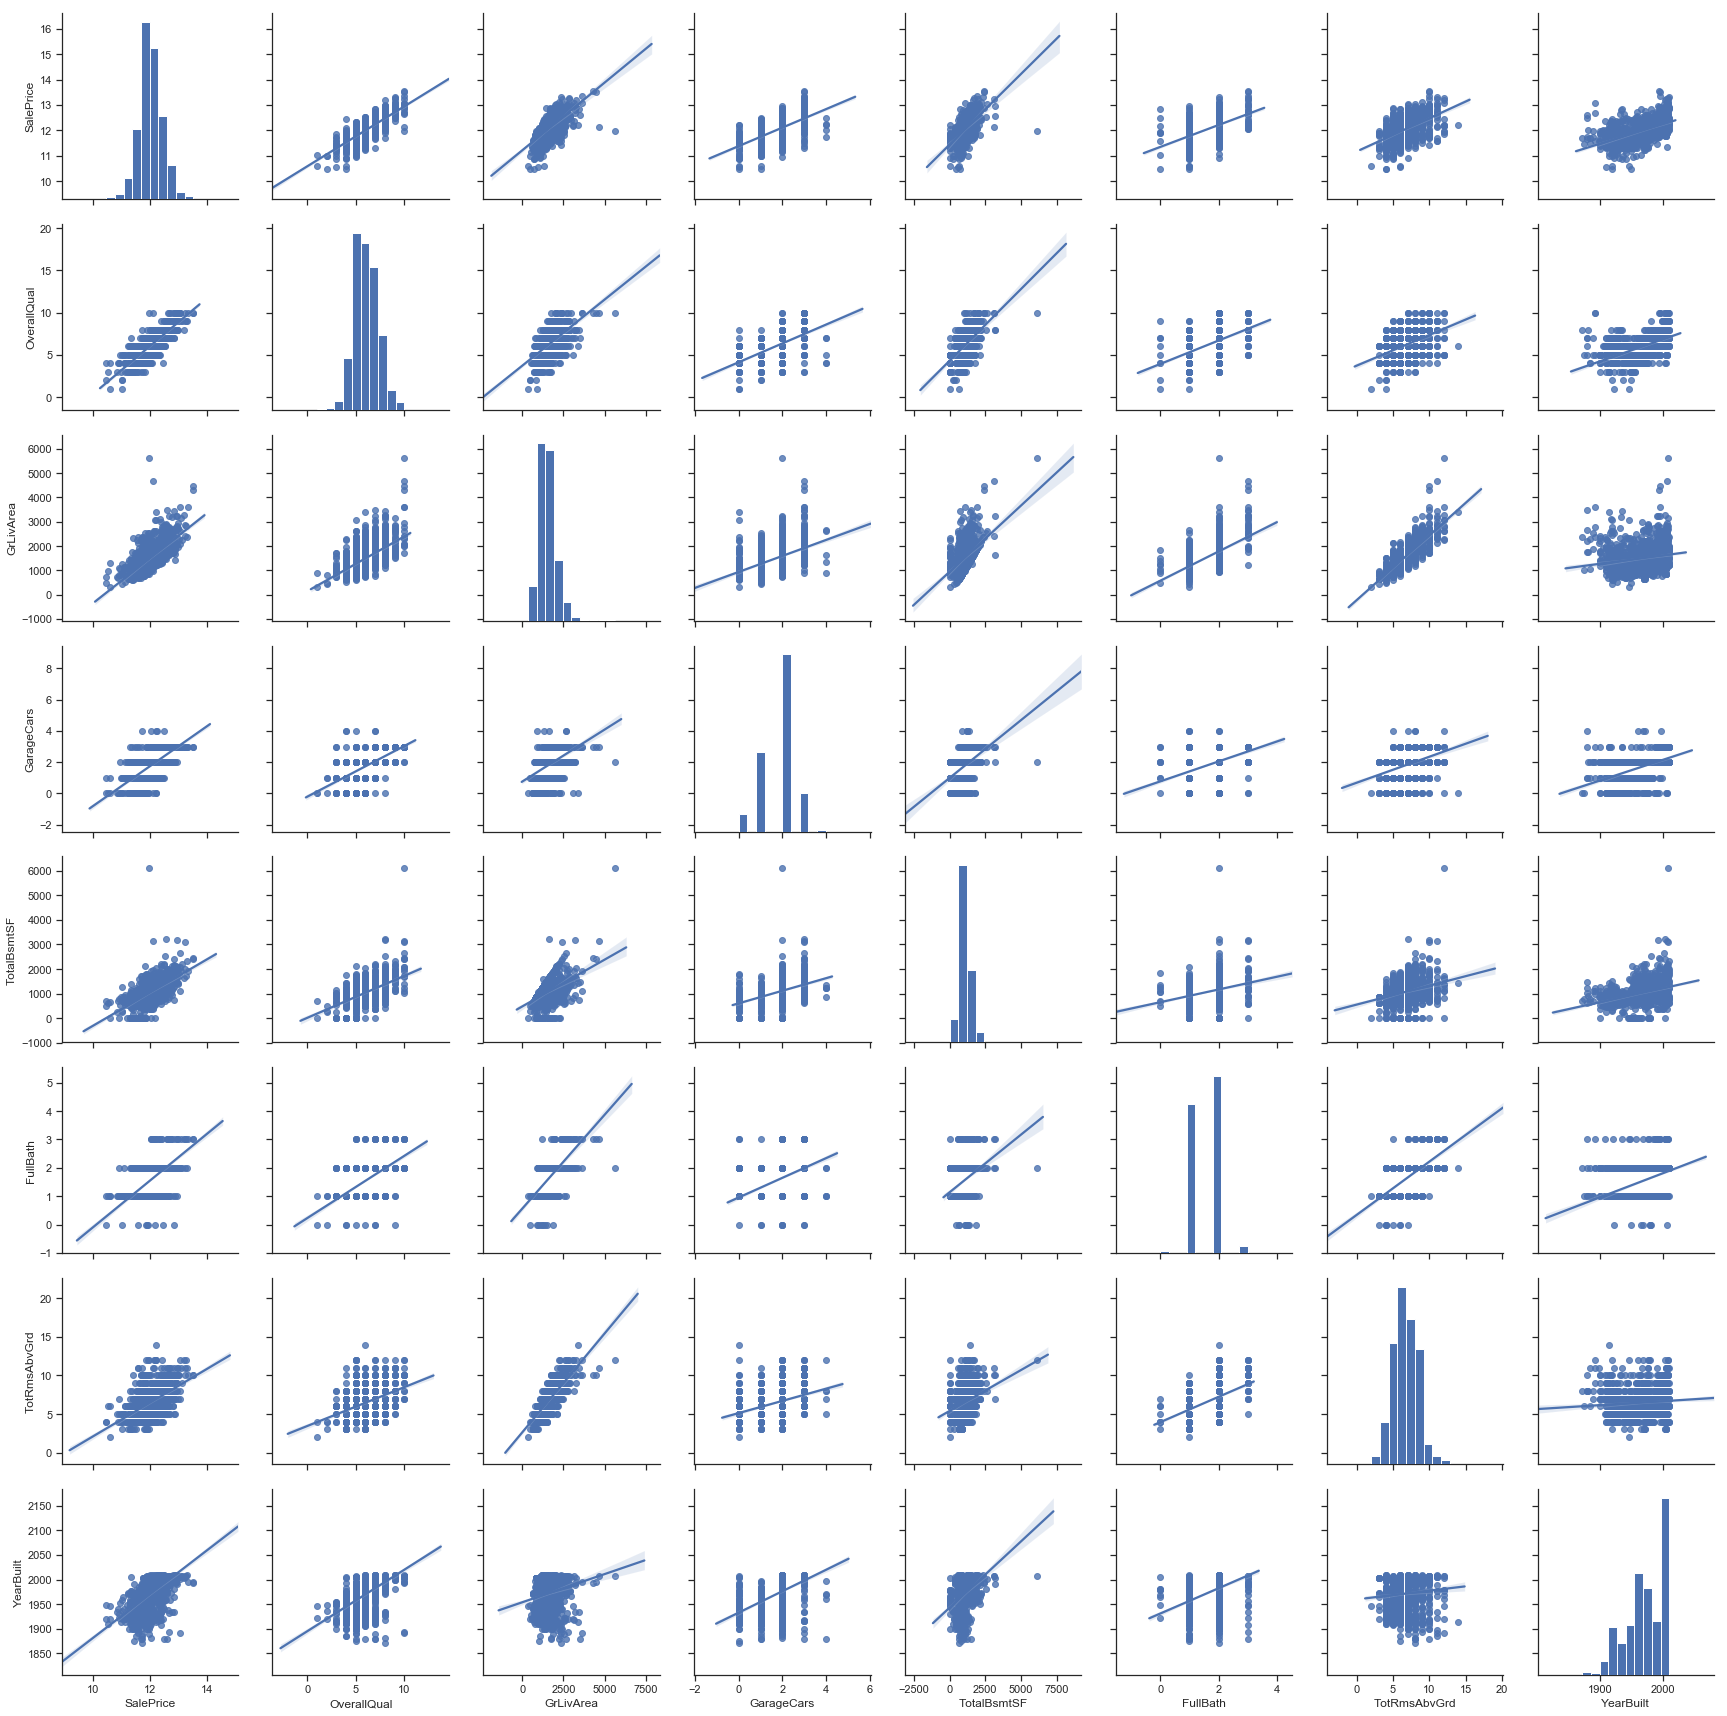

In [87]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [148]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

## Imputing missing values

In [149]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')

In [150]:
# Around 50% missing values attributes can also be filled by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [151]:
grouped_df = train.groupby("Neighborhood")
for key, item in grouped_df:
    print(grouped_df.get_group(key)[["Neighborhood", "SalePrice"]], "\n\n")

     Neighborhood  SalePrice
219       Blmngtn  12.027191
229       Blmngtn  12.167857
385       Blmngtn  12.165256
443       Blmngtn  12.058158
465       Blmngtn  12.093693
559       Blmngtn  12.363081
597       Blmngtn  12.176654
639       Blmngtn  12.485831
790       Blmngtn  11.984185
851       Blmngtn  12.278398
982       Blmngtn  11.982279
1004      Blmngtn  12.106258
1019      Blmngtn  12.271350
1023      Blmngtn  12.160034
1126      Blmngtn  12.066816
1394      Blmngtn  12.415438
1415      Blmngtn  12.077677 


    Neighborhood  SalePrice
599      Blueste  11.925042
956      Blueste  11.728045 


     Neighborhood  SalePrice
225        BrDale  11.626263
227        BrDale  11.571204
232        BrDale  11.456366
235        BrDale  11.402005
363        BrDale  11.678448
430        BrDale  11.355113
432        BrDale  11.715874
500        BrDale  11.635152
655        BrDale  11.385103
837        BrDale  11.512935
1029       BrDale  11.678448
1104       BrDale  11.571204
1219       

     Neighborhood  SalePrice
11        NridgHt  12.751303
20        NridgHt  12.692506
25        NridgHt  12.454108
27        NridgHt  12.631344
34        NridgHt  12.533580
35        NridgHt  12.641100
45        NridgHt  12.675767
62        NridgHt  12.218500
65        NridgHt  12.666660
151       NridgHt  12.827732
161       NridgHt  12.929994
162       NridgHt  12.301387
167       NridgHt  12.693502
199       NridgHt  12.524166
224       NridgHt  12.864243
238       NridgHt  12.669810
278       NridgHt  12.936754
282       NridgHt  12.242891
309       NridgHt  12.793862
320       NridgHt  12.744447
321       NridgHt  12.777055
332       NridgHt  12.556733
333       NridgHt  12.240479
343       NridgHt  12.491255
348       NridgHt  11.944714
349       NridgHt  12.988043
350       NridgHt  12.670002
389       NridgHt  12.962197
408       NridgHt  12.542548
440       NridgHt  13.226725
...           ...        ...
689       NridgHt  12.179220
707       NridgHt  12.445093
753       Nrid

In [152]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [153]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [154]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [155]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [156]:
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [157]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [158]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [159]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

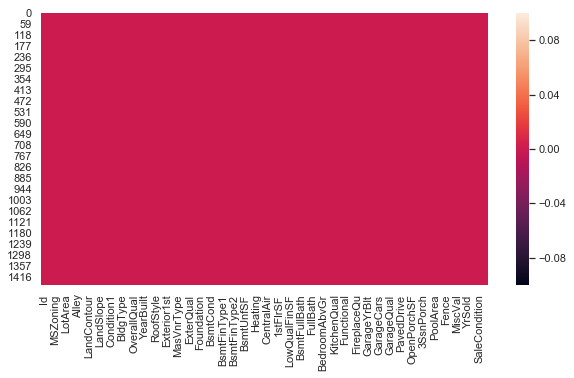

In [160]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

## Encoding

In [161]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,12.429220


In [163]:
del train["Id"]

In [164]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')
colIndex = [train.columns.get_loc(c) for c in cols if c in train]

In [165]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
trainLE = pd.DataFrame(train)
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    trainLE[c] = lbl.transform(list(train[c].values))

In [166]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,1,3,3,4,0,...,0,3,4,1,0,1,2,8,4,12.247699
1,0,3,80.0,9600,1,1,3,3,2,0,...,0,3,4,1,0,4,1,8,4,12.109016
2,5,3,68.0,11250,1,1,0,3,4,0,...,0,3,4,1,0,8,2,8,4,12.317171
3,6,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,1,0,8,0,11.849405
4,5,3,84.0,14260,1,1,0,3,2,0,...,0,3,4,1,0,11,2,8,4,12.429220


In [167]:
trainLE.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,1,3,3,4,0,...,0,3,4,1,0,1,2,8,4,12.247699
1,0,3,80.0,9600,1,1,3,3,2,0,...,0,3,4,1,0,4,1,8,4,12.109016
2,5,3,68.0,11250,1,1,0,3,4,0,...,0,3,4,1,0,8,2,8,4,12.317171
3,6,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,1,0,8,0,11.849405
4,5,3,84.0,14260,1,1,0,3,2,0,...,0,3,4,1,0,11,2,8,4,12.429220


In [168]:
trainLE.to_csv('ames_housing_preprocessed.csv', index=False)

In [169]:
stats.zscore(trainLE)

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


array([[ 0.2003501 , -0.04553194, -0.23187687, ...,  0.31386709,
         0.2085023 ,  0.56006699],
       [-1.00142126, -0.04553194,  0.43704276, ...,  0.31386709,
         0.2085023 ,  0.21276333],
       [ 0.2003501 , -0.04553194, -0.09809294, ...,  0.31386709,
         0.2085023 ,  0.73404616],
       ...,
       [ 0.44070438, -0.04553194, -0.18728222, ...,  0.31386709,
         0.2085023 ,  1.17470887],
       [-1.00142126, -0.04553194, -0.09809294, ...,  0.31386709,
         0.2085023 , -0.39965728],
       [-1.00142126, -0.04553194,  0.21406955, ...,  0.31386709,
         0.2085023 , -0.30669507]])

In [170]:
# from scipy import stats
# trainLE = trainLE[(np.abs(stats.zscore(trainLE)) < 2.5).all(axis=1)]

In [171]:
# trainLE = trainLE[trainLE["col"] < trainLE["col"].quantile(0.99)]

In [172]:
train.shape

(1460, 79)

In [173]:
trainLE.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,1,3,3,4,0,...,0,3,4,1,0,1,2,8,4,12.247699
1,0,3,80.0,9600,1,1,3,3,2,0,...,0,3,4,1,0,4,1,8,4,12.109016
2,5,3,68.0,11250,1,1,0,3,4,0,...,0,3,4,1,0,8,2,8,4,12.317171
3,6,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,1,0,8,0,11.849405
4,5,3,84.0,14260,1,1,0,3,2,0,...,0,3,4,1,0,11,2,8,4,12.429220


# Split the dataset

In [174]:
y = trainLE['SalePrice']

In [175]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [176]:
X = trainLE.copy(deep=True)
del X['SalePrice']

In [177]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,1,3,3,4,0,...,0,3,4,1,0,1,2,8,4,12.247699
1,0,3,80.0,9600,1,1,3,3,2,0,...,0,3,4,1,0,4,1,8,4,12.109016
2,5,3,68.0,11250,1,1,0,3,4,0,...,0,3,4,1,0,8,2,8,4,12.317171
3,6,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,1,0,8,0,11.849405
4,5,3,84.0,14260,1,1,0,3,2,0,...,0,3,4,1,0,11,2,8,4,12.429220


In [178]:
onehotencoder = OneHotEncoder(categorical_features = colIndex)
X = pd.DataFrame(onehotencoder.fit_transform(X).toarray())

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [179]:
X = X.values
y = y.values

In [180]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Feature scaling

In [181]:
X.shape

(1460, 659)

In [182]:
# from sklearn.preprocessing import StandardScaler, RobustScaler
# # gives bad result
# # Feature Scaling
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Linear Regression

## LinearRegressor

In [183]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [184]:
#Fit the model
fitObj = model.fit(X_train, y_train)

In [185]:
y_pred = model.predict(X_test)

In [186]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.61847159]
Real value 11.767187766223199


In [187]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  84.53452263570065


In [188]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.160983
MAE: 0.105961
R Squared: 0.845345
Adj. R Squared: 0.717948


# RandomForest Regressor

In [189]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=1000)
#Fit
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
mae = mean_absolute_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)
adj_r2 = 1-(1-r2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.134958
MAE: 0.093370
R Squared: 0.891308
Adj. R Squared: 0.801772


# XGBoost

In [190]:
XGBModel = XGBRegressor(n_estimators=250, learning_rate=0.05, subsample=1, random_state = 123)
XGBModel.fit(X_train, y_train)
XGBPred = XGBModel.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, XGBPred))
mae = mean_absolute_error(y_test, XGBPred)
r2 = r2_score(y_test, XGBPred)
adj_r2 = 1-(1-r2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

[19:42:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.119908
MAE: 0.084385
R Squared: 0.914198
Adj. R Squared: 0.843518


# Variance Inflation Factor

In [191]:
del train['SalePrice']

In [192]:
# prepare a dataframe for VIF
trainVIF = train[train.columns]
trainVIF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,65.0,8450,1,1,3,3,4,0,...,0,0,3,4,1,0,1,2,8,4
1,0,3,80.0,9600,1,1,3,3,2,0,...,0,0,3,4,1,0,4,1,8,4
2,5,3,68.0,11250,1,1,0,3,4,0,...,0,0,3,4,1,0,8,2,8,4
3,6,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,1,0,8,0
4,5,3,84.0,14260,1,1,0,3,2,0,...,0,0,3,4,1,0,11,2,8,4


In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(trainVIF.values, i) for i in range(trainVIF.shape[1])]
vif["features"] = trainVIF.columns
vif

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,11.542490,MSSubClass
1,35.964886,MSZoning
2,20.297640,LotFrontage
3,3.474589,LotArea
4,286.862528,Street
5,21.658038,Alley
6,3.617234,LotShape
7,21.639441,LandContour
8,5.117789,LotConfig
9,1.705968,LandSlope


# Model building after VIF

In [194]:
vifcols = ('LotArea', 'LotShape', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold')
# colIndex = [train.columns.get_loc(c) for c in vifcols if c in train]
# colIndex

In [195]:
train_VIF = train[vif[vif["VIF Factor"] < 10]['features'].values]
train_VIF.head()
# vif[vif["VIF Factor"] < 10]['features'].values

,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,...,GarageFinish,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,8450,3,4,0,5,2,0,5,1,1,...,2,0,61,0,0,0,0,0,1,2
1,9600,3,2,0,24,1,0,2,1,1,...,2,298,0,0,0,0,0,0,4,1
2,11250,0,4,0,5,2,0,5,1,1,...,2,0,42,0,0,0,0,0,8,2
3,9550,0,0,0,6,2,0,5,1,1,...,3,0,35,272,0,0,0,0,1,0
4,14260,0,2,0,15,2,0,5,1,1,...,2,192,84,0,0,0,0,0,11,2


In [196]:
train_VIF.columns.size

31

In [197]:
vifCatCols = np.intersect1d(train_VIF.columns, cols)
vifCatCols

array(['BldgType', 'BsmtExposure', 'BsmtFinType1', 'Condition1',
       'FireplaceQu', 'Foundation', 'GarageFinish', 'GarageType',
       'HeatingQC', 'HouseStyle', 'LandSlope', 'LotConfig', 'LotShape',
       'MasVnrArea', 'MoSold', 'Neighborhood', 'RoofMatl', 'RoofStyle',
       'YrSold'], dtype=object)

In [198]:
# Label Encoding after VIF selection

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
train_VIF_LE = pd.DataFrame(train_VIF)
for c in vifCatCols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_VIF_LE[c].values)) 
    train_VIF_LE[c] = lbl.transform(list(train_VIF_LE[c].values))

In [199]:
train_VIF_LE.head()

,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,...,GarageFinish,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,8450,3,4,0,5,2,0,5,1,1,...,2,0,61,0,0,0,0,0,1,2
1,9600,3,2,0,24,1,0,2,1,1,...,2,298,0,0,0,0,0,0,4,1
2,11250,0,4,0,5,2,0,5,1,1,...,2,0,42,0,0,0,0,0,8,2
3,9550,0,0,0,6,2,0,5,1,1,...,3,0,35,272,0,0,0,0,1,0
4,14260,0,2,0,15,2,0,5,1,1,...,2,192,84,0,0,0,0,0,11,2


In [201]:
colIndex1 = [train_VIF_LE.columns.get_loc(c) for c in cols if c in train_VIF_LE]
onehotencoder = OneHotEncoder(categorical_features = colIndex1)
train_VIF_LE = pd.DataFrame(onehotencoder.fit_transform(train_VIF_LE).toarray())
train_VIF_LE.shape

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(1460, 469)

## Split the dataset

In [202]:
y_vif = y
y_vif

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [203]:
X_vif = pd.DataFrame(train_VIF_LE).values

In [204]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vif, y_vif, test_size=0.2, random_state=7)

## Model building after VIF

### Linear Regressor

In [205]:
#Train the model
from sklearn import linear_model
lrModel_Vif = linear_model.LinearRegression()
lrModel_Vif.fit(X_vif, y_vif)
y_vif_pred = lrModel_Vif.predict(X_test)

In [206]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_vif_pred))
mae = mean_absolute_error(y_test, y_vif_pred)
r2 = r2_score(y_test, y_vif_pred)
adj_r2 = 1-(1-r2)*(X_vif.shape[0]-1)/(X_vif.shape[0]-X_vif.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.144176
MAE: 0.102175
R Squared: 0.875952
Adj. R Squared: 0.817187


### RandomForestRegressor

In [207]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rf_model_vif = RandomForestRegressor(n_estimators=1000)
#Fit
rf_model_vif.fit(X_train, y_train)
rf_y_pred_vif = rf_model_vif.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred_vif))
mae = mean_absolute_error(y_test, rf_y_pred_vif)
r2 = r2_score(y_test, rf_y_pred_vif)
adj_r2 = 1-(1-r2)*(X_vif.shape[0]-1)/(X_vif.shape[0]-X_vif.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.203038
MAE: 0.145120
R Squared: 0.753989
Adj. R Squared: 0.637444


### XGBoost

In [222]:
XGBModel_vif = XGBRegressor(n_estimators=280, learning_rate=0.07, subsample=1, random_state = 123)
XGBModel_vif.fit(X_train, y_train)
XGBPred_vif = XGBModel_vif.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, XGBPred_vif))
mae = mean_absolute_error(y_test, XGBPred_vif)
r2 = r2_score(y_test, XGBPred_vif)
adj_r2 = 1-(1-r2)*(X_vif.shape[0]-1)/(X_vif.shape[0]-X_vif.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

[19:55:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.184856
MAE: 0.135297
R Squared: 0.796075
Adj. R Squared: 0.699469


# Use PCA

In [223]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# gives bad result
# Feature Scaling
scaler = MinMaxScaler()
# X_train_sc = scaler.fit_transform(X_train)
# X_test_sc = scaler.transform(X_test)
X_sc = scaler.fit_transform(train)

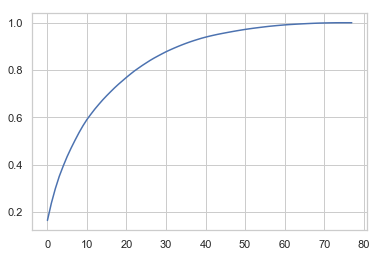

In [224]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_sc)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [225]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1642839 , 0.23725628, 0.29841508, 0.35072541, 0.3943226 ,
       0.43460517, 0.47037989, 0.50367451, 0.53557288, 0.56464429,
       0.59082324, 0.61334204, 0.63501556, 0.65490187, 0.6740017 ,
       0.69170041, 0.70854035, 0.72497003, 0.74036232, 0.75479118,
       0.76915894, 0.78283192, 0.79605323, 0.80782129, 0.8194457 ,
       0.83028237, 0.8409922 , 0.85075698, 0.85983721, 0.86868944,
       0.87729791, 0.88500918, 0.89240964, 0.8994855 , 0.90624527,
       0.91260341, 0.91863037, 0.92420161, 0.92946028, 0.93454359,
       0.93902799, 0.94322695, 0.94705001, 0.95071071, 0.95402147,
       0.95719017, 0.9603042 , 0.96334274, 0.96624619, 0.96905636,
       0.97173939, 0.97420844, 0.97651149, 0.97866186, 0.98073822,
       0.98278027, 0.98472657, 0.98639077, 0.98799828, 0.98945623,
       0.9908404 , 0.99208592, 0.99309764, 0.99405915, 0.99496951,
       0.9958026 , 0.99662666, 0.99738599, 0.99805439, 0.99863733,
       0.99901956, 0.99937   , 0.99967864, 0.99992635, 1.     

In [238]:
plotX = pd.DataFrame(np.array(X_sc))

pca_1d = PCA(n_components=60)
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX))
# PCs_1d.columns = ["PC1_1d", 'PC1_2d', 'PC1_3d', 'pc1_4d']


In [239]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(PCs_1d, y, test_size=0.2, random_state=7)

In [240]:
#Train the model
from sklearn import linear_model
lrModel_Vif = linear_model.LinearRegression()
lrModel_Vif.fit(X_train_pca, y_train_pca)
y_pred_pca = lrModel_Vif.predict(X_test_pca)

In [241]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
mae = mean_absolute_error(y_test_pca, y_pred_pca)
r2 = r2_score(y_test_pca, y_pred_pca)
adj_r2 = 1-(1-r2)*(PCs_1d.shape[0]-1)/(PCs_1d.shape[0]-PCs_1d.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.131949
MAE: 0.100172
R Squared: 0.896101
Adj. R Squared: 0.891645


## Model Building after VIF and Top Corr Features

In [242]:
# train_VIF = train[vif[vif["VIF Factor"] < 10]['features'].values]
vif_columns = vif[vif["VIF Factor"] < 10]['features'].values
corr_columns = top_feature
index = np.argwhere(corr_columns=='SalePrice')
print(index)
corr_columns = np.delete(corr_columns, np.argwhere(corr_columns=='SalePrice'))

corr_columns

[[11]]


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [243]:
vif_corr_columns = np.union1d(vif_columns, corr_columns)
vif_corr_columns

array(['1stFlrSF', '3SsnPorch', 'BldgType', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFullBath', 'BsmtHalfBath', 'Condition1',
       'EnclosedPorch', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'GarageArea', 'GarageCars', 'GarageFinish',
       'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC',
       'HouseStyle', 'LandSlope', 'LotArea', 'LotConfig', 'LotShape',
       'MasVnrArea', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF',
       'OverallQual', 'PoolArea', 'RoofMatl', 'RoofStyle', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'], dtype=object)

In [292]:
train_vif_corr = train[vif_corr_columns]
train_vif_corr.head()

,1stFlrSF,3SsnPorch,BldgType,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtHalfBath,Condition1,EnclosedPorch,FireplaceQu,...,PoolArea,RoofMatl,RoofStyle,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,0,0,3,2,1,0,2,0,3,...,0,1,1,0,8,856,0,2003,2003,2
1,1262,0,0,1,0,0,1,1,0,5,...,0,1,1,0,6,1262,298,1976,1976,1
2,920,0,0,2,2,1,0,2,0,5,...,0,1,1,0,6,920,0,2001,2002,2
3,961,0,0,3,0,1,0,2,272,2,...,0,1,1,0,7,756,0,1915,1970,0
4,1145,0,0,0,2,1,0,2,0,5,...,0,1,1,0,9,1145,192,2000,2000,2


In [296]:
colIndex2 = [train_vif_corr.columns.get_loc(c) for c in cols if c in train_vif_corr]
onehotencoder = OneHotEncoder(categorical_features = colIndex2)
train_vif_corr = pd.DataFrame(onehotencoder.fit_transform(train_vif_corr).toarray())
train_vif_corr.shape

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(1460, 480)

In [293]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_vif_corr, y, test_size=0.2, random_state=7)

## Linear Regressor with Features from VIF and Corr

In [294]:
#Train the model
from sklearn import linear_model
lrModel_Vif_Corr = linear_model.LinearRegression()
lrModel_Vif_Corr.fit(X_train, y_train)
y_vif_corr_pred = lrModel_Vif_Corr.predict(X_test)

In [295]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_vif_corr_pred))
mae = mean_absolute_error(y_test, y_vif_corr_pred)
r2 = r2_score(y_test, y_vif_corr_pred)
adj_r2 = 1-(1-r2)*(train_vif_corr.shape[0]-1)/(train_vif_corr.shape[0]-train_vif_corr.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.144045
MAE: 0.107827
R Squared: 0.876178
Adj. R Squared: 0.872508


## RandomForestRegressor with Features from VIF and Corr

In [297]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rf_model_vif_corr = RandomForestRegressor(n_estimators=1000)
#Fit
rf_model_vif_corr.fit(X_train, y_train)
rf_y_pred_vif_corr = rf_model_vif_corr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred_vif_corr))
mae = mean_absolute_error(y_test, rf_y_pred_vif_corr)
r2 = r2_score(y_test, rf_y_pred_vif_corr)
adj_r2 = 1-(1-r2)*(train_vif_corr.shape[0]-1)/(train_vif_corr.shape[0]-train_vif_corr.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.144504
MAE: 0.099515
R Squared: 0.875387
Adj. R Squared: 0.814290


## XGBoost with Features from VIF and Corr

In [298]:
XGBModel_vif_corr = XGBRegressor(n_estimators=300, learning_rate=0.07, subsample=1, random_state = 123)
XGBModel_vif_corr.fit(X_train, y_train)
XGBPred_vif_corr = XGBModel_vif_corr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, XGBPred_vif_corr))
mae = mean_absolute_error(y_test, XGBPred_vif_corr)
r2 = r2_score(y_test, XGBPred_vif_corr)
adj_r2 = 1-(1-r2)*(train_vif_corr.shape[0]-1)/(train_vif_corr.shape[0]-train_vif_corr.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

[20:10:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.132628
MAE: 0.092575
R Squared: 0.895029
Adj. R Squared: 0.843562


# Model building with VIF, Top Corr and Feature Importance

In [250]:
XGBModel = XGBRegressor(n_estimators=90, learning_rate=0.05, subsample=0.9, random_state = 42)
# XGBModel = XGBRegressor()
XGBModel.fit(train,y)

feat_imp = pd.DataFrame()
feat_imp['Features'] = train.columns
feat_imp['Relative Importance'] = XGBModel.feature_importances_
# XGBModel.feature_importances_

feat_imp.sort_values(inplace=True, ascending=False, by='Relative Importance')
feat_imp

[19:57:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Features,Relative Importance
56,GarageType,0.185200
59,GarageCars,0.139703
36,TotalBsmtSF,0.070886
54,Fireplaces,0.068256
15,OverallQual,0.058853
17,YearBuilt,0.047339
44,GrLivArea,0.038052
39,CentralAir,0.036733
18,YearRemodAdd,0.036461
28,BsmtQual,0.025419


In [251]:
selected_imp_features = feat_imp[feat_imp['Relative Importance'] > 0.01]['Features']
selected_imp_features.values

array(['GarageType', 'GarageCars', 'TotalBsmtSF', 'Fireplaces',
       'OverallQual', 'YearBuilt', 'GrLivArea', 'CentralAir',
       'YearRemodAdd', 'BsmtQual', 'GarageYrBlt', 'LotArea', 'GarageArea',
       'PavedDrive', 'KitchenQual', 'GarageFinish', 'LotFrontage',
       'BsmtFinSF1', 'GarageQual', 'BsmtFinType1', 'OverallCond'],
      dtype=object)

In [252]:
vif_corr_fi_columns = np.union1d(vif_corr_columns, selected_imp_features.values)

In [253]:
train_vif_corr_fi = train[vif_corr_fi_columns]
train_vif_corr_fi.head()

,1stFlrSF,3SsnPorch,BldgType,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtHalfBath,BsmtQual,CentralAir,...,PoolArea,RoofMatl,RoofStyle,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,0,0,3,706,2,1,0,2,1,...,0,1,1,0,8,856,0,2003,2003,2
1,1262,0,0,1,978,0,0,1,2,1,...,0,1,1,0,6,1262,298,1976,1976,1
2,920,0,0,2,486,2,1,0,2,1,...,0,1,1,0,6,920,0,2001,2002,2
3,961,0,0,3,216,0,1,0,4,1,...,0,1,1,0,7,756,0,1915,1970,0
4,1145,0,0,0,655,2,1,0,2,1,...,0,1,1,0,9,1145,192,2000,2000,2


In [299]:
colIndex3 = [train_vif_corr_fi.columns.get_loc(c) for c in cols if c in train_vif_corr_fi]
onehotencoder = OneHotEncoder(categorical_features = colIndex3)
train_vif_corr_fi = pd.DataFrame(onehotencoder.fit_transform(train_vif_corr_fi).toarray())
train_vif_corr_fi.shape

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(1460, 511)

In [300]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_vif_corr_fi, y, test_size=0.2, random_state=7)

## LinearRegressor with VIF, Corr and Feat Imp

In [301]:
#Train the model
from sklearn import linear_model
lrModel_Vif_Corr_Fi = linear_model.LinearRegression()
lrModel_Vif_Corr_Fi.fit(X_train, y_train)
y_vif_corr_fi_pred = lrModel_Vif_Corr_Fi.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_vif_corr_fi_pred))
mae = mean_absolute_error(y_test, y_vif_corr_fi_pred)
r2 = r2_score(y_test, y_vif_corr_fi_pred)
adj_r2 = 1-(1-r2)*(train_vif_corr_fi.shape[0]-1)/(train_vif_corr_fi.shape[0]-train_vif_corr_fi.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 1129177.467315
MAE: 66412.292684
R Squared: -7608964976507.766602
Adj. R Squared: -11710421836208.166016


## RandomForestRegressor with VIF, Corr and Feat Imp

In [302]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rf_model_vif_corr_fi = RandomForestRegressor(n_estimators=1000)
#Fit
rf_model_vif_corr_fi.fit(X_train, y_train)
rf_y_pred_vif_corr_fi = rf_model_vif_corr_fi.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred_vif_corr_fi))
mae = mean_absolute_error(y_test, rf_y_pred_vif_corr_fi)
r2 = r2_score(y_test, rf_y_pred_vif_corr_fi)
adj_r2 = 1-(1-r2)*(train_vif_corr_fi.shape[0]-1)/(train_vif_corr_fi.shape[0]-train_vif_corr_fi.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.135816
MAE: 0.093020
R Squared: 0.889921
Adj. R Squared: 0.830585


## XGBoost with VIF, Corr and Feat Imp

In [303]:
XGBModel_vif_corr_fi = XGBRegressor(n_estimators=300, learning_rate=0.07, subsample=1, random_state = 123)
XGBModel_vif_corr_fi.fit(X_train, y_train)
XGBPred_vif_corr_fi = XGBModel_vif_corr_fi.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, XGBPred_vif_corr_fi))
mae = mean_absolute_error(y_test, XGBPred_vif_corr_fi)
r2 = r2_score(y_test, XGBPred_vif_corr_fi)
adj_r2 = 1-(1-r2)*(train_vif_corr_fi.shape[0]-1)/(train_vif_corr_fi.shape[0]-train_vif_corr_fi.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

[20:13:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.126879
MAE: 0.087870
R Squared: 0.903932
Adj. R Squared: 0.852148


# Check distribution of few important features

In [258]:
top_imp_feat = feat_imp[feat_imp['Relative Importance'] > 0.05]['Features']
top_imp_feat

56     GarageType
59     GarageCars
36    TotalBsmtSF
54     Fireplaces
15    OverallQual
Name: Features, dtype: object

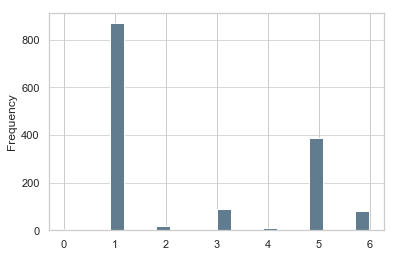

In [259]:
train[top_imp_feat.values[0]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.grid(axis='y', alpha=0.75)

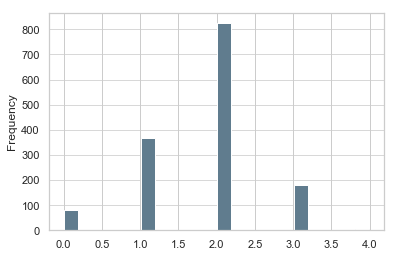

In [260]:
train[top_imp_feat.values[1]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.grid(axis='y', alpha=0.75)

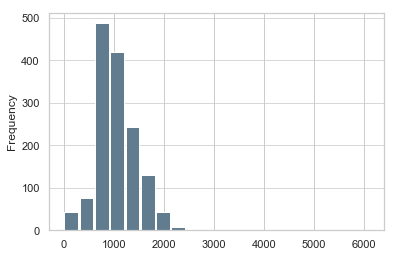

In [261]:
train[top_imp_feat.values[2]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.grid(axis='y', alpha=0.75)

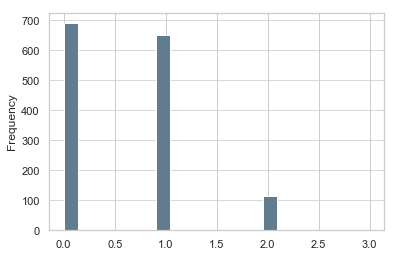

In [262]:
train[top_imp_feat.values[3]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.grid(axis='y', alpha=0.75)

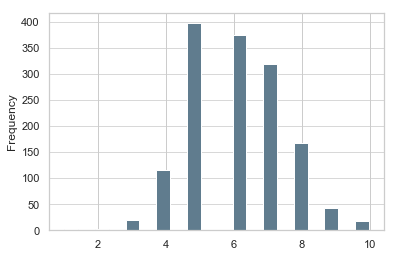

In [263]:
train[top_imp_feat.values[4]].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.grid(axis='y', alpha=0.75)

##### -- No significant changes can be made to the distribution of numerical important features -- 
##### -- Hence, moving forward. --

## Analyze p-value and take decision

In [266]:
import statsmodels.api as sm
from scipy import stats
# X2 = sm.add_constant(train)
est = sm.OLS(y, train)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.406e+05
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:00:40   Log-Likelihood:                 821.36
No. Observations:                1460   AIC:                            -1493.
Df Residuals:                    1385   BIC:                            -1096.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass        0.0032      0.002      1.497

In [267]:
p_val_df = pd.DataFrame()
p_val_df['Features'] = train.columns
p_val_df['P Value'] = est2.pvalues.values
p_val_df
# est2.pvalues

,Features,P Value
0,MSSubClass,1.345847e-01
1,MSZoning,3.137454e-01
2,LotFrontage,8.754193e-02
3,LotArea,1.064211e-03
4,Street,1.590301e-03
5,Alley,1.635692e-01
6,LotShape,1.188346e-01
7,LandContour,1.285284e-01
8,LotConfig,5.647388e-01
9,LandSlope,1.227502e-02


In [268]:
train_p_val = train[p_val_df[p_val_df['P Value'] < 0.05]['Features']]
train_p_val.shape

(1460, 30)

In [269]:
train_p_val.columns

Index(['LotArea', 'Street', 'LandSlope', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofMatl', 'BsmtFinType1', 'BsmtFinSF2', 'TotalBsmtSF', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
       'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [270]:
final_cols = np.union1d(vif_corr_fi_columns, train_p_val.columns)
print(final_cols.shape)
print(final_cols)

(56,)
['1stFlrSF' '3SsnPorch' 'BldgType' 'BsmtExposure' 'BsmtFinSF1'
 'BsmtFinSF2' 'BsmtFinType1' 'BsmtFullBath' 'BsmtHalfBath' 'BsmtQual'
 'CentralAir' 'Condition1' 'Condition2' 'Electrical' 'EnclosedPorch'
 'FireplaceQu' 'Fireplaces' 'Foundation' 'FullBath' 'Functional'
 'GarageArea' 'GarageCars' 'GarageFinish' 'GarageQual' 'GarageType'
 'GarageYrBlt' 'GrLivArea' 'HalfBath' 'HeatingQC' 'HouseStyle'
 'KitchenQual' 'LandSlope' 'LotArea' 'LotConfig' 'LotFrontage' 'LotShape'
 'MasVnrArea' 'MiscVal' 'MoSold' 'Neighborhood' 'OpenPorchSF'
 'OverallCond' 'OverallQual' 'PavedDrive' 'PoolArea' 'RoofMatl'
 'RoofStyle' 'SaleCondition' 'ScreenPorch' 'Street' 'TotRmsAbvGrd'
 'TotalBsmtSF' 'WoodDeckSF' 'YearBuilt' 'YearRemodAdd' 'YrSold']


In [271]:
final_train = train[final_cols]
final_train.head()

,1stFlrSF,3SsnPorch,BldgType,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFullBath,BsmtHalfBath,BsmtQual,...,RoofStyle,SaleCondition,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,0,0,3,706,0,2,1,0,2,...,1,4,0,1,8,856,0,2003,2003,2
1,1262,0,0,1,978,0,0,0,1,2,...,1,4,0,1,6,1262,298,1976,1976,1
2,920,0,0,2,486,0,2,1,0,2,...,1,4,0,1,6,920,0,2001,2002,2
3,961,0,0,3,216,0,0,1,0,4,...,1,0,0,1,7,756,0,1915,1970,0
4,1145,0,0,0,655,0,2,1,0,2,...,1,4,0,1,9,1145,192,2000,2000,2


In [304]:
colIndex4 = [final_train.columns.get_loc(c) for c in cols if c in final_train]
onehotencoder = OneHotEncoder(categorical_features = colIndex4)
final_train = pd.DataFrame(onehotencoder.fit_transform(final_train).toarray())
final_train.shape

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(1460, 536)

In [305]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_train, y, test_size=0.2, random_state=7)

In [306]:
# final_dataset = final_train.copy(deep=True)
# final_dataset['Sale Price'] = y
# final_dataset.head()
# final_dataset.to_csv('ames_housing_preprocessed_feat_sel.csv', index=False)

### Linear Regression with VIF, FI, Corr and P val

In [307]:
#Train the model
from sklearn import linear_model
lrModel_final = linear_model.LinearRegression()
lrModel_final.fit(X_train, y_train)
y_pred_final = lrModel_final.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae = mean_absolute_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)
adj_r2 = 1-(1-r2)*(final_train.shape[0]-1)/(final_train.shape[0]-final_train.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.134964
MAE: 0.095601
R Squared: 0.891298
Adj. R Squared: 0.828173


### RandomForestRegressor with VIF, FI, Corr and P val

In [308]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rf_model_final = RandomForestRegressor(n_estimators=1000)
#Fit
rf_model_final.fit(X_train, y_train)
rf_y_pred_final = rf_model_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred_final))
mae = mean_absolute_error(y_test, rf_y_pred_final)
r2 = r2_score(y_test, rf_y_pred_final)
adj_r2 = 1-(1-r2)*(final_train.shape[0]-1)/(final_train.shape[0]-final_train.shape[1]-1)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

RMSE: 0.134507
MAE: 0.091885
R Squared: 0.892032
Adj. R Squared: 0.829334


### XGBoost with VIF, FI, Corr and P val

In [310]:
XGBModel_final = XGBRegressor(n_estimators=300, learning_rate=0.07, subsample=1, random_state = 123)
XGBModel_final.fit(X_train, y_train)
XGBPred_final = XGBModel_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, XGBPred_final))
mae = mean_absolute_error(y_test, XGBPred_final)
r2 = r2_score(y_test, XGBPred_final)

# Check the difference in adj. r squared after the below line changes
# adj_r2 = 1-(1-r2)*(final_train.shape[0]-1)/(final_train.shape[0]-final_train.shape[1]-1)
adj_r2 = 1-(1-r2)*(final_train.shape[0]-1)/(final_train.shape[0]-55)
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))
print("R Squared: %f" % (r2))
print("Adj. R Squared: %f" % (adj_r2))

[20:19:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.122405
MAE: 0.085911
R Squared: 0.910587
Adj. R Squared: 0.907151


## --- This is the baseline model for Linear Regression ---

# Apply PCA

In [382]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,5,3,65.0,8450,1,1,3,3,4,...,0,0,3,4,1,0,1,2,8,4
1,2,0,3,80.0,9600,1,1,3,3,2,...,0,0,3,4,1,0,4,1,8,4
2,3,5,3,68.0,11250,1,1,0,3,4,...,0,0,3,4,1,0,8,2,8,4
3,4,6,3,60.0,9550,1,1,0,3,0,...,0,0,3,4,1,0,1,0,8,0
4,5,5,3,84.0,14260,1,1,0,3,2,...,0,0,3,4,1,0,11,2,8,4


In [383]:
del train['Id']

In [384]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=train.shape[1])
pca = pca.fit(train)


In [385]:
# Generate PCA results plot
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
        # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n    %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)


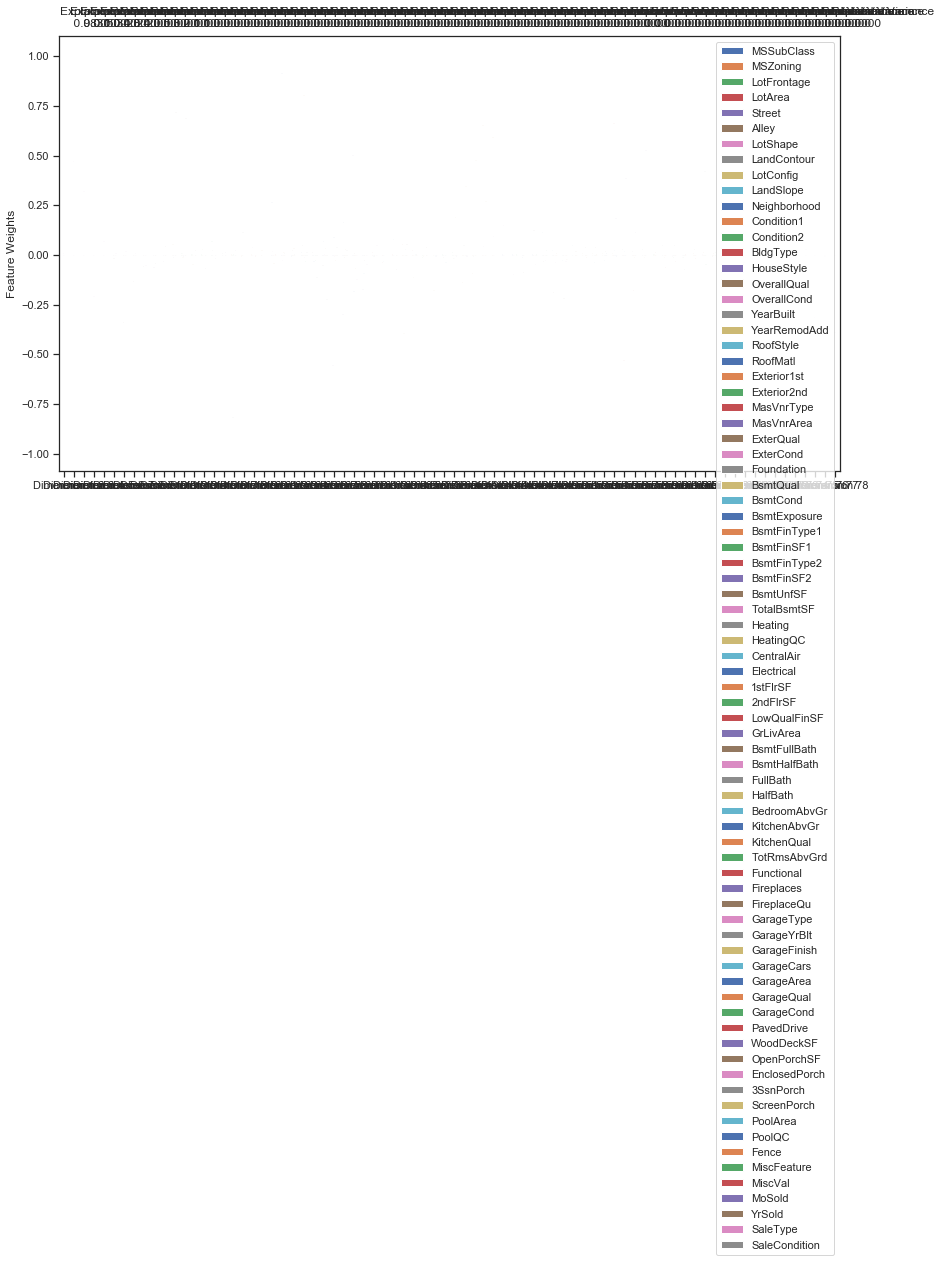

In [386]:
pca_results = pca_results(train, pca)

In [387]:
pca_results.cumsum()

,Explained Variance,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Dimension 1,0.9831,-0.0001,-0.0000,0.0008,0.9997,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,0.0002,0.0003,-0.0000,0.0000,0.0000,0.0019,0.0000,-0.0000,0.000000e+00,0.0000
Dimension 2,0.9881,-0.0003,-0.0001,0.0124,0.9767,0.0000,0.0000,-0.0003,0.0000,-0.0001,...,0.0079,0.0086,-0.0000,0.0002,-0.0001,-0.0348,0.0002,-0.0001,-2.000000e-04,0.0002
Dimension 3,0.9915,-0.0024,-0.0001,0.0142,0.9714,0.0000,0.0000,-0.0004,0.0000,0.0000,...,0.0086,0.0095,0.0000,0.0002,-0.0001,-0.0733,0.0000,0.0000,-3.000000e-04,0.0002
Dimension 4,0.9943,-0.0004,-0.0001,0.0141,0.9662,0.0000,0.0000,-0.0005,0.0000,-0.0001,...,0.0137,0.0173,0.0000,0.0000,-0.0001,0.0810,-0.0001,0.0000,-5.421011e-20,0.0001
Dimension 5,0.9967,-0.0009,-0.0001,0.0148,0.9640,0.0000,0.0000,-0.0006,0.0000,-0.0001,...,0.0169,0.0189,0.0000,0.0000,0.0000,1.0674,-0.0001,0.0000,-5.421011e-20,0.0001
Dimension 6,0.9987,-0.0004,0.0000,0.0171,0.9615,0.0000,0.0000,-0.0006,-0.0001,-0.0001,...,0.0146,0.0242,0.0000,0.0000,0.0000,1.0503,-0.0001,0.0000,-5.421011e-20,-0.0002
Dimension 7,0.9992,-0.0013,0.0002,0.0249,0.9588,0.0000,-0.0001,-0.0006,-0.0003,-0.0003,...,0.0275,0.0283,0.0000,-0.0006,0.0000,1.0548,0.0001,0.0001,-4.000000e-04,-0.0006
Dimension 8,0.9995,-0.0017,0.0002,0.0210,0.9577,0.0000,-0.0001,-0.0008,-0.0001,-0.0002,...,0.0520,0.0371,0.0000,-0.0010,-0.0001,1.0513,-0.0002,0.0003,-3.000000e-04,-0.0008
Dimension 9,0.9997,-0.0017,-0.0005,0.0338,0.9576,-0.0001,-0.0001,-0.0013,0.0002,-0.0004,...,0.0321,0.0234,0.0000,-0.0005,-0.0001,1.0601,-0.0002,0.0003,-7.000000e-04,-0.0001
Dimension 10,0.9998,-0.0009,-0.0002,0.0173,0.9567,-0.0001,-0.0002,-0.0024,0.0003,-0.0004,...,-0.0373,0.0283,0.0000,-0.0012,0.0000,1.0623,0.0001,0.0006,4.000000e-04,0.0001


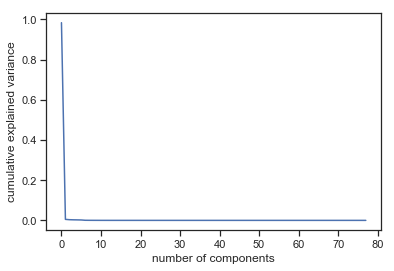

In [388]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


#### Oulier detection